In [3]:
import os

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [4]:
treemodel = DecisionTreeClassifier()

In [5]:
telcoDF = pd.read_csv('/Users/trevor/Documents/Tiber Training/telco_churn.csv')
telcoDF.drop('customerID', axis=1, inplace=True)

In [6]:
#Total Charges is shopwing up as an object. Interesting.
telcoDF.replace(" ", np.nan, inplace=True)
telcoDF['TotalCharges'] = telcoDF['TotalCharges'].astype('float')
telcoDF['TotalCharges'].fillna((telcoDF['TotalCharges'].mean()), inplace=True)

In [7]:
telcoDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
x_values = telcoDF.loc[:, telcoDF.columns != 'Churn']
y_values = telcoDF.loc[:, 'Churn']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=60)

In [27]:
len(X_test)
len(y_test)

5634

In [10]:
categorical_values = X_train.select_dtypes(include=[object]).columns.values

In [11]:
X_train = pd.get_dummies(X_train, categorical_values)

In [12]:
y_train = pd.get_dummies(y_train, drop_first=True)

In [13]:
X_test = pd.get_dummies(X_test, categorical_values)

In [14]:
y_test = pd.get_dummies(y_train, drop_first=True)

In [15]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
scores = cross_val_score(treemodel,X_train, y_train, cv=10)
print(np.mean(scores))

0.728258569215


In [17]:
tpr = cross_val_score(treemodel, X_train, y_train, cv=10, scoring='precision')
print(np.mean(tpr))

0.466640426005


In [18]:
tpr.sort()
fpr.sort()

NameError: name 'fpr' is not defined

In [19]:
fpr = cross_val_score(treemodel, X_train, y_train, cv=10, scoring='recall')
print(np.mean(fpr))

0.490540540541


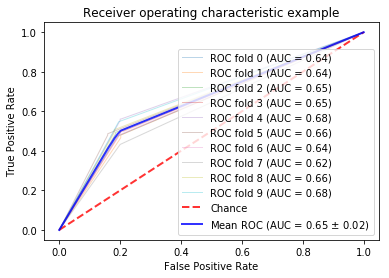

In [20]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_train, y_train):
#     v = clf.fit(X_train.iloc[train], Y_train.iloc[train])
    probas_ = treemodel.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[test])
    #Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [23]:
len(y_test)

5634

In [21]:
treemodel.score(X=X_test, y=y_test)

ValueError: Found input variables with inconsistent numbers of samples: [5634, 1409]